## Introduction
This notebook explores the diffusion pattern of smart furniture as a comparable innovation to the Beflo Tenon Smart Adjustable Desk (2024), one of TIME’s Best Inventions of 2024.  Using historical data from Statista on the global smart furniture market, the Bass Diffusion Model is applied to understand adoption behavior and predict future market trends.




In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import load_smart_furniture_market
from helper_functions import bass_model

## Data Loading and Overview
The dataset used in this project was obtained from Statista and represents the market value of the global smart furniture market (in million USD) from 2016 to 2025.  
The raw Excel file contains metadata rows that are skipped during import to focus on the relevant numerical data.

## Data Cleaning and Preparation

Before analysis, the dataset was cleaned by:
- Removing empty or irrelevant rows.
- Renaming columns for clarity.
- Converting “Year” values to integers.
- Ensuring market values are numeric (floats).  

These steps ensure the dataset is ready for time series analysis and model fitting.

---


## Exploratory Data Analysis (EDA)

The following visualization illustrates the overall trend in the smart furniture market.  
From 2016 to 2025, the market shows a steady upward trend, indicating consistent growth and increased consumer adoption of smart home technologies.  
This trend makes the data suitable for diffusion modeling.


In [3]:
file_path = "../data/smart-furniture-market.xlsx"

df = load_smart_furniture_market(file_path=file_path)
df


,Year,Smart Furniture Market
0,2016,111.70
1,2017,136.27
2,2018,166.25
3,2019,202.83
4,2020,247.45
5,2021,301.89
6,2022,368.31
7,2023,449.34
8,2024,548.20
9,2025,668.80


## Model Prediction and Visualization

The plot below compares the actual data and the Bass model’s predicted diffusion curve.  
The close alignment between the observed and predicted values suggests that the Bass model provides a reasonable approximation of real-world adoption trends.  

Future adoption is also projected for several years ahead, based on the model.


Predictions for the next 3 years:
Year 10: 709.53
Year 11: 788.21
Year 12: 866.23


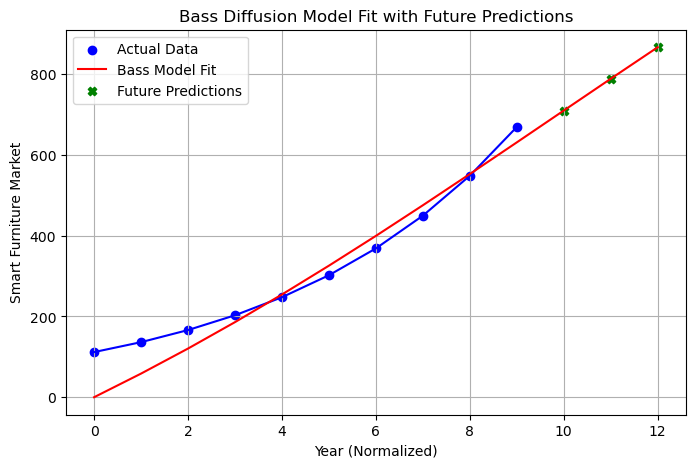

Estimated Parameters:
p (Coefficient of Innovation): 0.0283
q (Coefficient of Imitation): 0.0920
M (Market Potential): 2006.40
0.028254765792460227 0.09199583774050132 2006.39999997371 [709.52642367 788.21310251 866.23145964]


In [10]:
df["Year"] = df["Year"] - df["Year"].min()

t_values = df["Year"].values  
adoption_values = df["Smart Furniture Market"].values  

# Initial guesses for p, q, and M
initial_guess = [0.01, 0.1, max(adoption_values) * 2]  

# We will set lower bounds for p and q to avoid them being zero
lower_bounds = [0.0001, 0.01, 0]  
upper_bounds = [1, 1, max(adoption_values) * 3] 

params, _ = curve_fit(bass_model, t_values, adoption_values, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=10000)


p_est, q_est, M_est = params

t_pred = np.arange(0, max(t_values) + 4)  
adoption_pred = bass_model(t_pred, p_est, q_est, M_est)

# Predictions for the next 3 years
future_years = t_pred[-3:]
future_predictions = adoption_pred[-3:]

print("Predictions for the next 3 years:")
for year, pred in zip(future_years, future_predictions):
    print(f"Year {year + df['Year'].min()}: {pred:.2f}") 

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(t_values, adoption_values, label="Actual Data", color="blue")
plt.plot(t_values, adoption_values, linestyle="-", color="blue")  
plt.plot(t_pred, adoption_pred, label="Bass Model Fit", color="red")
plt.scatter(future_years, future_predictions, label="Future Predictions", color="green", marker="X")
plt.xlabel("Year (Normalized)")
plt.ylabel("Smart Furniture Market")
plt.title("Bass Diffusion Model Fit with Future Predictions")
plt.legend()
plt.grid()

plt.savefig("../img/bass_model_fit_with_future_predictions.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Print estimated parameters
print(f"Estimated Parameters:")
print(f"p (Coefficient of Innovation): {p_est:.4f}")
print(f"q (Coefficient of Imitation): {q_est:.4f}")
print(f"M (Market Potential): {M_est:.2f}")

# Return the parameters and future predictions
p_value = p_est
q_value = q_est
M_value = M_est
future_predictions_values = future_predictions

print(p_value, q_value, M_value, future_predictions_values)


## Model Prediction and Visualization

The plot below shows the Bass model fitted to the observed smart furniture market data.  
Blue points represent the actual data, and the red line shows the model’s predicted cumulative adopters over time.



Estimated number of adopters over time (cumulative):
Year 0: 0 adopters
Year 1: 58 adopters
Year 2: 179 adopters
Year 3: 365 adopters
Year 4: 619 adopters
Year 5: 945 adopters
Year 6: 1344 adopters
Year 7: 1819 adopters
Year 8: 2372 adopters
Year 9: 3002 adopters
Year 10: 3712 adopters
Year 11: 4500 adopters
Year 12: 5366 adopters
Year 13: 6309 adopters
Year 14: 7327 adopters


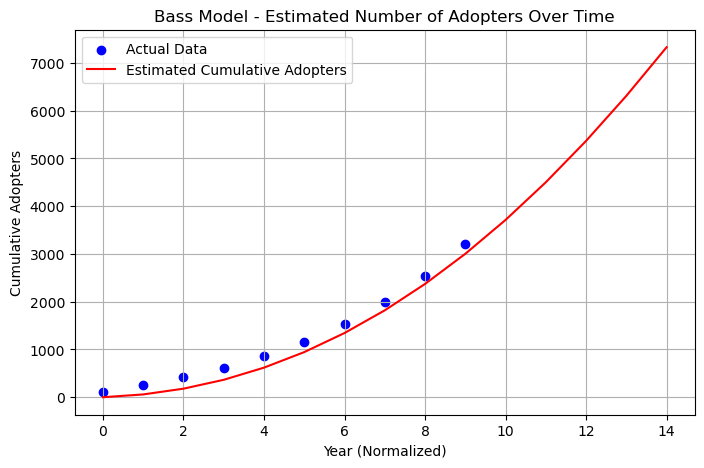


Estimated Parameters:
p (Coefficient of Innovation): 0.0283
q (Coefficient of Imitation): 0.0920
M (Market Potential): 2006.40


(0.028254765792460227,
 0.09199583774050132,
 2006.39999997371,
 array([   0.        ,   58.4838156 ,  178.9639066 ,  364.79127762,
         619.08677591,  944.67161053, 1343.99998371, 1819.09696806,
        2371.50478298, 3002.24038766, 3711.76681133, 4499.97991383,
        5366.21137347, 6309.24772137, 7327.36428279]))

In [9]:
def estimate_adopters_over_time(df, estimated_p=None, estimated_q=None, estimated_M=None):
    t_values = df["Year"].values  
    adoption_values = df["Smart Furniture Market"].values  

    if estimated_p is None or estimated_q is None or estimated_M is None:
        initial_guess = [0.01, 0.1, max(adoption_values) * 2] 
        
    
        lower_bounds = [0.0001, 0.01, 0]  
        upper_bounds = [1, 1, max(adoption_values) * 3]  

        params, _ = curve_fit(bass_model, t_values, adoption_values, p0=initial_guess, bounds=(lower_bounds, upper_bounds), maxfev=10000)
        p_est, q_est, M_est = params
    else:
        p_est, q_est, M_est = estimated_p, estimated_q, estimated_M
    

    t_pred = np.arange(0, max(t_values) + 6)  
    adoption_pred = bass_model(t_pred, p_est, q_est, M_est)


    cumulative_adopters = np.cumsum(adoption_pred)

 
    print("\nEstimated number of adopters over time (cumulative):")
    for year, adopters in zip(t_pred, cumulative_adopters):
        print(f"Year {year}: {adopters:.0f} adopters")

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.scatter(t_values, np.cumsum(adoption_values), label="Actual Data", color="blue")
    plt.plot(t_pred, cumulative_adopters, label="Estimated Cumulative Adopters", color="red")
    plt.xlabel("Year (Normalized)")
    plt.ylabel("Cumulative Adopters")
    plt.title("Bass Model - Estimated Number of Adopters Over Time")
    plt.legend()
    plt.grid()
    
    plt.savefig("../img/bass_model_adopters.png", dpi=300, bbox_inches="tight")
    plt.show()

    print(f"\nEstimated Parameters:")
    print(f"p (Coefficient of Innovation): {p_est:.4f}")
    print(f"q (Coefficient of Imitation): {q_est:.4f}")
    print(f"M (Market Potential): {M_est:.2f}")

    return p_est, q_est, M_est, cumulative_adopters

estimate_adopters_over_time(df)

In [6]:
import pandas as pd

file_path = "../data/revenue-home-office-furniture-market-worldwide-by-country-2024.xlsx"

df1 = pd.read_excel(file_path, sheet_name=1, skiprows=4)

df1 = df1.dropna(how='all').dropna(axis=1, how='all')

df1.columns = ["Country", "Revenue (million USD)"]

df1["Revenue (million USD)"] = (
    df1["Revenue (million USD)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)
print(df1)




           Country  Revenue (million USD)
0    United States               18915.96
1          Germany                4576.99
2            China                4003.01
3            Italy                2293.73
4           France                1593.17
5   United Kingdom                1425.50
6            Japan                1143.12
7           Canada                1123.71
8      Netherlands                1055.96
9           Russia                 958.69
10       Australia                 923.28
11          Brazil                 726.89
12          Sweden                 684.01
13     South Korea                 530.86
14           Spain                 498.66
15          Mexico                 492.25
16    Saudi Arabia                 432.17
17          Turkey                 412.54
18       Hong Kong                 380.02
19     Switzerland                 365.67
20       Argentina                 297.25
21           India                 215.61
22        Thailand                

## Top 10 Countries by Smart Furniture Revenue (2024)

The following bar chart highlights the top 10 countries by smart furniture revenue in 2024.  
The United States leads with a significant market share, followed by Germany and China.  
This distribution demonstrates that smart furniture adoption is a global trend, which supports the decision to analyze the diffusion model on a worldwide scale rather than focusing on a single country.


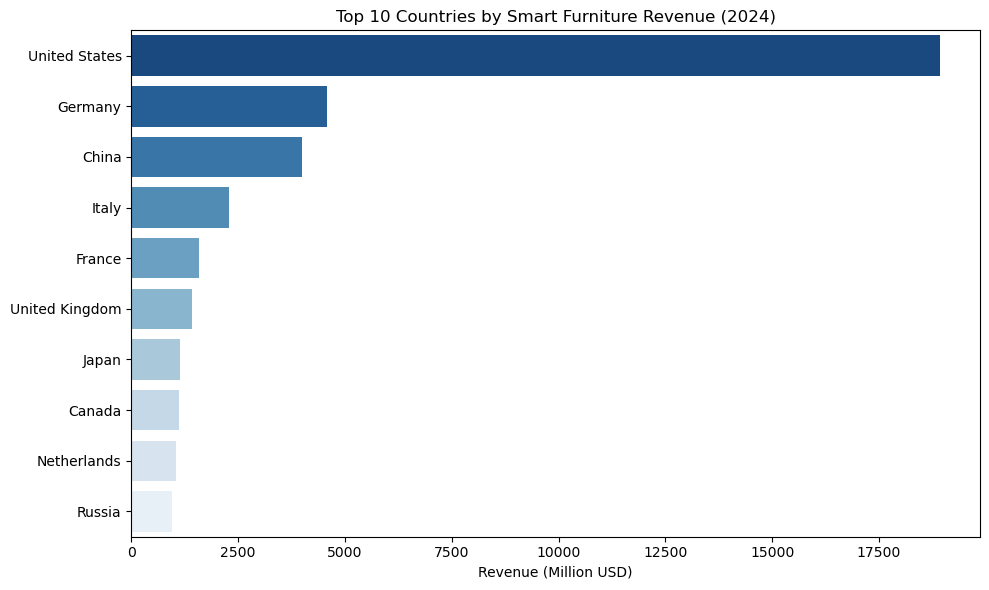

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df1_sorted = df1.sort_values(by="Revenue (million USD)", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df1_sorted,
    x="Revenue (million USD)",
    y="Country",
    palette="Blues_r"
)
plt.title("Top 10 Countries by Smart Furniture Revenue (2024)")
plt.xlabel("Revenue (Million USD)")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../img/top10_countries_smart_furniture_revenue_2024.png", dpi=300, bbox_inches="tight")
plt.show()
